In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

print(f'72 paskaita. Vyno kokybės vertinimas.')
print('Pasiruošta',dt.now().replace(microsecond=0))

72 paskaita. 1 dalis. Vyno kokybės vertinimas.
Pasiruošta 2025-01-02 19:12:54


In [4]:
# Wine Quality Dataset
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

/home/administratorius/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/administratorius/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [5]:
df = pd.read_csv('./csv/WineQT.csv')

In [12]:
print(df.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [14]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [15]:
df.dropna(inplace=True)
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

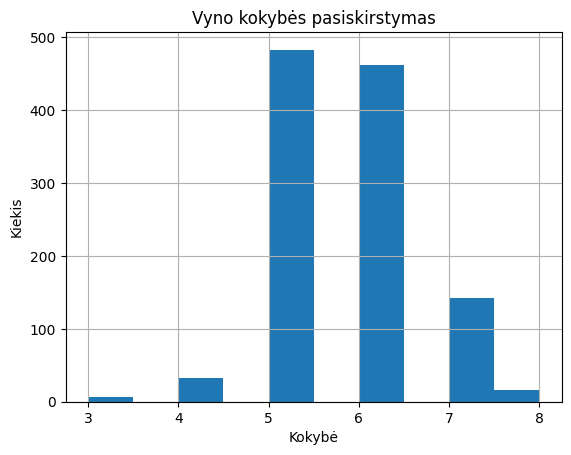

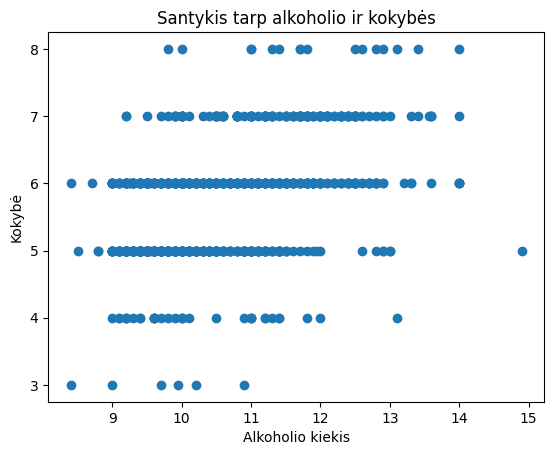

In [16]:
import matplotlib.pyplot as plt

# Histograma kokybė
df['quality'].hist()
plt.title('Vyno kokybė')
plt.xlabel('Kokybė')
plt.ylabel('Kiekis')
plt.show()

# Santykis tarp alkoholio kiekio ir kokybės
plt.scatter(df['alcohol'], df['quality'])
plt.title('Santykis tarp alkoholio ir kokybės')
plt.xlabel('Alkoholio kiekis')
plt.ylabel('Kokybė')
plt.show()

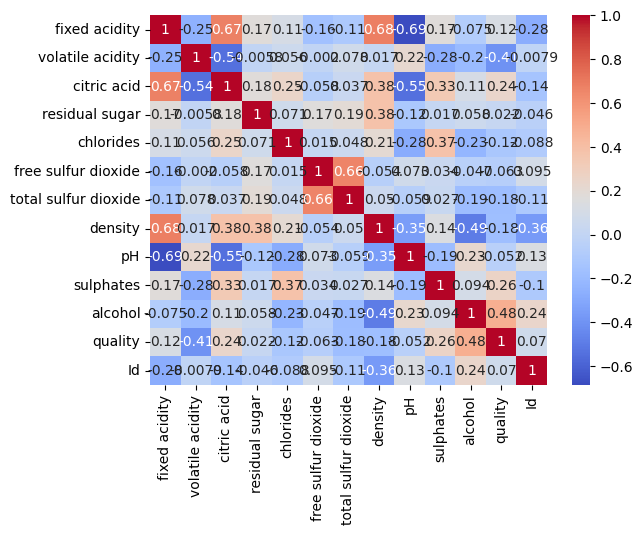

In [8]:
correlation = df.corr()
# print(correlation)

# Vizualizuokite koreliaciją
import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

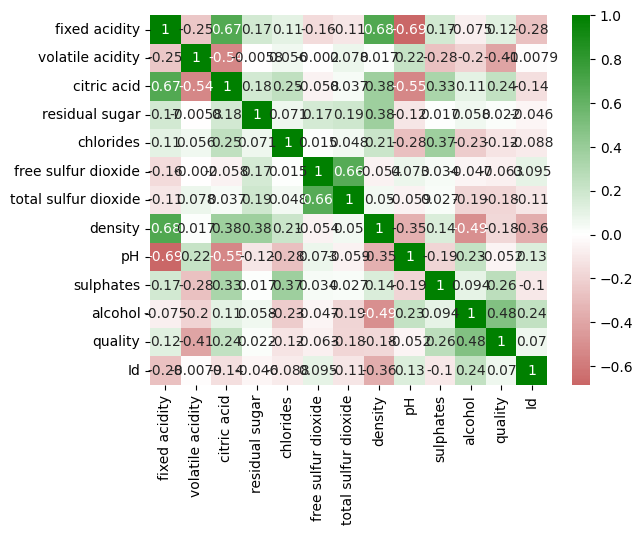

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Sukurkite spalvų žemėlapį
colors = ["firebrick", "white", "green"]  # Raudona -1, balta 0, žalia 1
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Duomenų koreliacijos matrica
correlation = df.corr()

# Koreliacijos žemėlapio vizualizacija
sns.heatmap(correlation, annot=True, cmap=cmap, center=0)
plt.show()

In [10]:
# 2. Duomenų padalinimas

from sklearn.model_selection import train_test_split

# X bus visi stulpeliai išskyrus 'quality', o y bus 'quality'
X = df.drop('quality', axis=1)
y = df['quality']

# Daliname duomenis, naudodami train_test_split funkciją
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
# print("Paprastas regresijos modelis - tiesinė regresija")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sukurkime modelį
model = LinearRegression()

# Mokome modelį su mokymo imtimi
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# 4. Modelio vertinimas

# Naudojame modelį prognozei su testavimo duomenimis
y_pred = model.predict(X_test)

# Įvertiname modelį
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Modelio vidutinė kvadratinė klaida (MSE): {mse}")
print(f"R kvadratas (R²): {r2}")

Modelio vidutinė kvadratinė klaida (MSE): 0.3876614008647903
R kvadratas (R²): 0.3332557138421479


In [15]:
# Modelio mokymas nauapmokant dojant sprendimų medį

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sukurkime sprendimų medžio modelį
tree_model = DecisionTreeClassifier(random_state=42)

# Mokome modelį su mokymo duomenimis
tree_model.fit(X_train, y_train)

# Prognozavimas naudojant testavimo duomenis
y_pred = tree_model.predict(X_test)

# Modelio vertinimas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Modelio tikslumas: {accuracy}")
print("Klasifikacijos ataskaita:")
print(report)

Modelio tikslumas: 0.5918367346938775
Klasifikacijos ataskaita:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.68      0.69      0.68       143
           6       0.61      0.55      0.58       146
           7       0.43      0.54      0.48        41
           8       0.22      0.50      0.31         4

    accuracy                           0.59       343
   macro avg       0.32      0.38      0.34       343
weighted avg       0.60      0.59      0.59       343



/home/administratorius/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/administratorius/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/administratorius/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Modelio parametrų nustatymas
# Sprendimų medžiai gali būti linkę į mokymosi perteklinį pritaikymą (angl. overfitting), ypač kai medis auga per giliai. Todėl verta reguliuoti kai kuriuos parametrus, pvz., max_depth (maksimalus gylio lygis), min_samples_split (minimalus mėginių skaičius padalinimui) ar min_samples_leaf (minimalus mėginių skaičius lapelyje):

# Sukurkime sprendimų medį su ribojimais
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

# Įvertiname vėl
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelio tikslumas po reguliavimo: {accuracy}")

Modelio tikslumas po reguliavimo: 0.6064139941690962


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

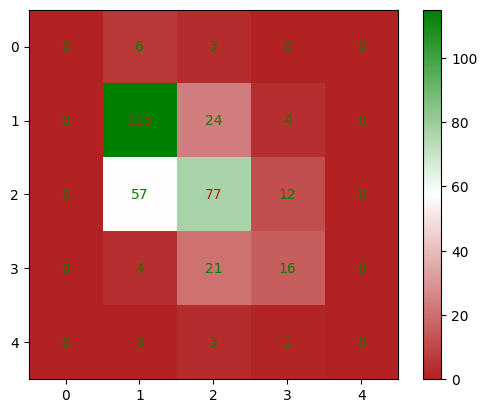

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap=cmap)
plt.title('Painiavos matrica')
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Gaukite ir atspausdinkite klasifikacijos ataskaitą
report = classification_report(y_test, y_pred)
print("Klasifikacijos ataskaita:")
print(report)

Klasifikacijos ataskaita:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.63      0.80      0.71       143
           6       0.60      0.53      0.56       146
           7       0.48      0.39      0.43        41
           8       0.00      0.00      0.00         4

    accuracy                           0.61       343
   macro avg       0.34      0.34      0.34       343
weighted avg       0.58      0.61      0.59       343



/home/administratorius/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/administratorius/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/administratorius/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [24]:
from sklearn.metrics import accuracy_score

# Apskaičiuokite tikslumą
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelio tikslumas: {accuracy}")

Modelio tikslumas: 0.6064139941690962


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

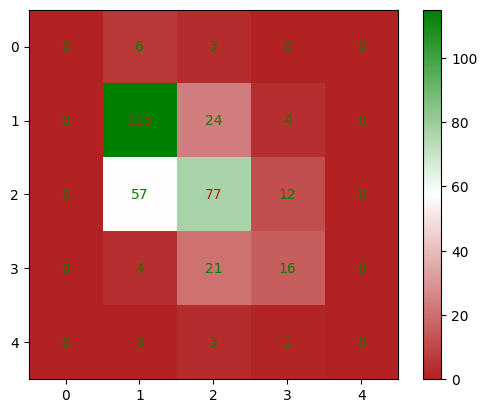

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Įsitikinkime, kad turite modelį, kuris jau yra išmokytas, ir testavimo rinkinį
# Čia y_pred yra modelio prognozės, o y_test - tikrieji duomenys

# Sukurkime painiavos matricą
cm = confusion_matrix(y_test, y_pred)

# Gauname unikalias klases iš y_test arba modelio, jei tai yra tiesiogiai prieinama
# Pavyzdžiui, jei naudojate DecisionTreeClassifier
classes = tree_model.classes_

# Vizualizuokite painiavos matricą su teisingu etikečių skaičiumi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=cmap)
plt.title('Painiavos matrica')
plt.show()

Testas


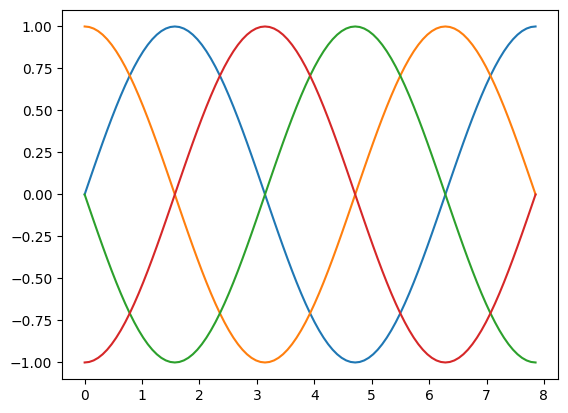

In [11]:
print('Testas')

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, (2.5+1/40)*np.pi, np.pi/40)
ysin = np.sin(x)
plt.plot(x, ysin)
ycos = np.cos(x)
plt.plot(x, ycos)
ycos = np.cos(x+np.pi/2)
plt.plot(x, ycos)
ycos = np.cos(x+np.pi)
plt.plot(x, ycos)